In [3]:
import numpy as np
import glob
import xarray as xr
import os
import matplotlib.pyplot as plt

path_era5   = '/home/hanna/lagrings/ERA5_tcc/'
path_target = '/home/hanna/lagrings/ERA5_monthly/'
path_python_figs = '/home/hanna/MS-thesis/python_figs/'
search_key = '*2012*09*'

# Get files in test period and combine with coords

In [25]:
def get_list_of_files(start = '2014-01-01', stop = '2018-12-31', include_start = True, include_stop = True, path_input = None):
    print('enters, searching in directory {}'.format(path_input))
    # Remove date.
    parts = start.split('-')
    start_search_str = '{}_{:02d}'.format(parts[0], int(parts[1]))

    if stop is not None:
        parts = stop.split('-')
        stop_search_str = '{}_{:02d}'.format(parts[0], int(parts[1]))
    else:
        stop_search_str = ''

    if (start_search_str == stop_search_str) or (stop is None):
        subset = glob.glob(os.path.join( path_input, '{}*.nc'.format(start_search_str)))
    else:
        # get all files
        files = glob.glob(os.path.join( path_input, '*.nc' ))
        files = np.sort(files) # sorting then for no particular reson

        if include_start and include_stop:
            min_fil = os.path.join(path_input, start_search_str + '_q.nc')
            max_fil = os.path.join(path_input, stop_search_str + '_tcc.nc')

            smaller = files[files <= max_fil]
            subset  = smaller[smaller >= min_fil] # results in all the files

        elif include_start and not include_stop:
            min_fil = os.path.join(path_input, start_search_str + '_q.nc')
            max_fil = os.path.join(path_input, stop_search_str + '_q.nc')

            smaller = files[files < max_fil]
            subset  = smaller[smaller >= min_fil] # results in all the files

        elif not include_start and include_stop:
            min_fil = os.path.join(path_input, start_search_str + '_tcc.nc')
            max_fil = os.path.join(path_input, stop_search_str + '_tcc.nc')

            smaller = files[files <= max_fil]
            subset  = smaller[smaller > min_fil] # results in all the files
        else:
            raise ValueError('Something wierd happend. ')
    return subset


In [32]:
era5_files = get_list_of_files(start = '2014-01-01', 
                               stop = '2018-12-31', 
                               include_start = True, 
                               include_stop = True, 
                               path_input = path_era5)

target_files = get_list_of_files(start = '2014-01-01', 
                               stop = '2018-12-31', 
                               include_start = True, 
                               include_stop = True, 
                               path_input = path_target)

enters, searching in directory /home/hanna/lagrings/ERA5_tcc/
enters, searching in directory /home/hanna/lagrings/ERA5_monthly/


In [30]:
# era5 = glob.glob(path_era5+search_key)
# target = glob.glob(path_target+search_key+'*tcc*')

In [36]:
target_data = xr.open_mfdataset(target_files, combine = 'by_coords')

In [38]:
diff = abs(target_data-era5_data).mean('time')

NameError: name 'result' is not defined

In [41]:
diff.to_netcdf(os.path.join(path_python_figs, 'mae_target_vs_era5.nc'))

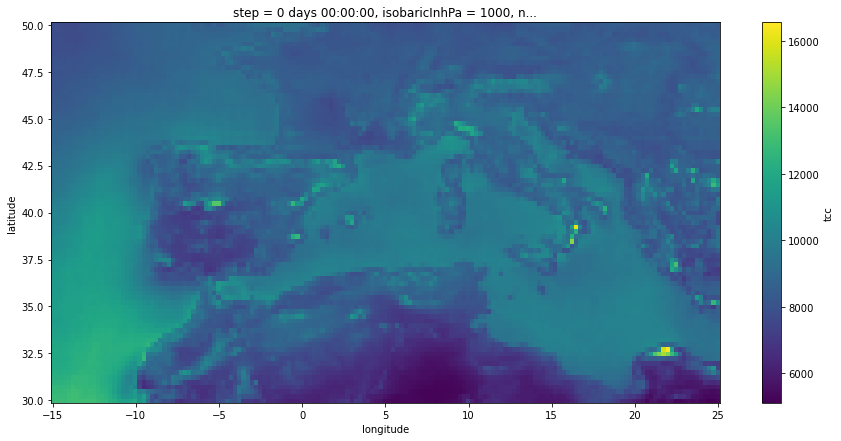

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
diff['tcc'].plot(ax=ax)
plt.savefig(path_python_figs+'mae_test.png')

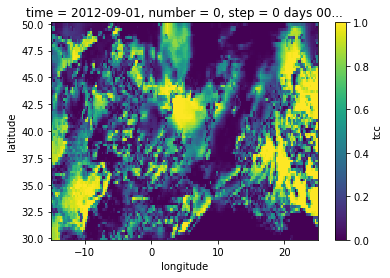

In [15]:
diff.isel(time =0)['tcc'].plot()

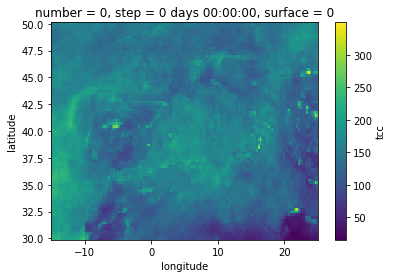

In [47]:
tot_sum = abs(target_data-era5_data).sum()

In [49]:
tot_sum['tcc'].values

array(1.16508643e+08)

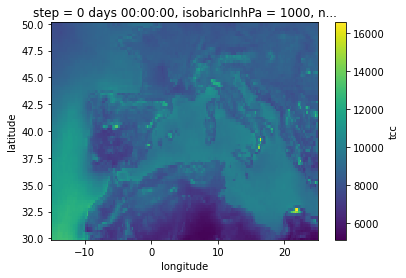

In [4]:
xr.open_dataset(os.path.join(path_python_figs, 'mae_target_vs_era5.nc'))['tcc'].plot()

In [27]:
# data.isel(time = 24)['tcc'].plot()

# Merge files of target and ERA